In [1]:
# Configuración de Entorno para trabajar con Procesamiento de Imágenes.
!pip install opencv-python-headless
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

In [2]:
# Función para subir 2 imágenes
def upload_images():
    print("Por favor, suba dos imágenes.")
    uploaded = files.upload()
    while len(uploaded) != 2:
        print("Debe cargar exactamente dos imágenes.")
        uploaded = files.upload()
    images = {}
    for filename in uploaded.keys():
        path = '/content/' + filename
        with open(path, 'wb') as f:
            f.write(uploaded[filename])
        image = cv2.imread(path)
        images[filename] = image
    return images

In [3]:
# Técnica 1: Ecualización del Histograma (NumPy)
def histogram_equalization(image):
    if image.ndim == 2:
        return equalize_grayscale(image)
    elif image.ndim == 3 and image.shape[2] == 3:
        return equalize_color(image)

In [4]:
def equalize_grayscale(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    return cdf[image]

In [5]:
def equalize_color(image):
    img_hsv = np.array(Image.fromarray(image).convert('HSV'))
    img_hsv[:, :, 2] = equalize_grayscale(img_hsv[:, :, 2])
    img_eq = Image.fromarray(img_hsv, 'HSV').convert('RGB')
    return np.array(img_eq)

In [6]:
# Técnica 2: Ajuste de Gamma (OpenCV)
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [7]:
# Visualización de Resultados
def display_images(images):
    for name, image in images.items():
        original_size = image.shape
        hist_eq_image = histogram_equalization(image)
        gamma_image = adjust_gamma(image, gamma=1.5)

        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'Imagen Original: {name}\n{original_size}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(hist_eq_image, cv2.COLOR_BGR2RGB))
        plt.title('Imagen con Ecualización del Histograma')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(gamma_image, cv2.COLOR_BGR2RGB))
        plt.title('Imagen con Ajuste de Gamma')
        plt.axis('off')

        plt.show()

Por favor, suba dos imágenes.


Saving Atardecer.jpg to Atardecer.jpg
Saving Campeona.jpg to Campeona.jpg


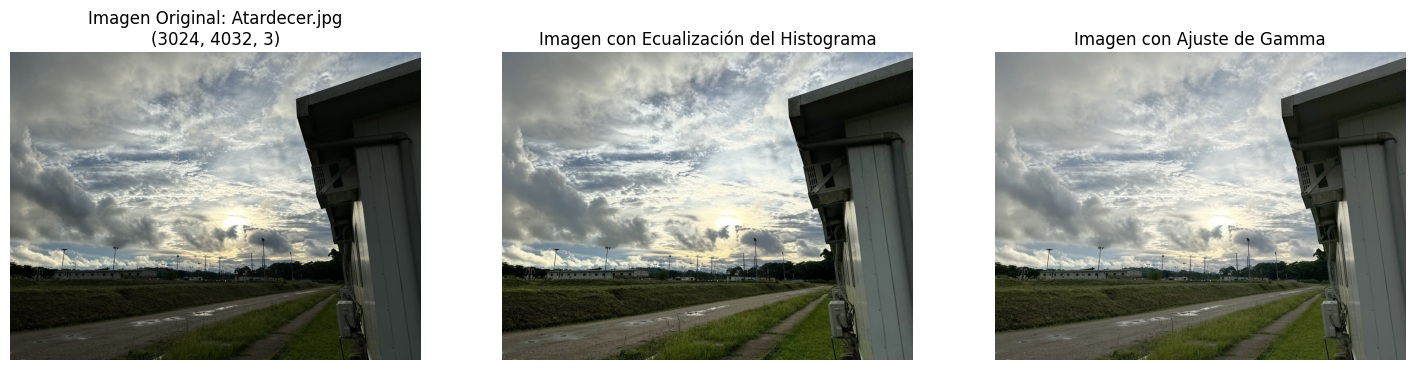

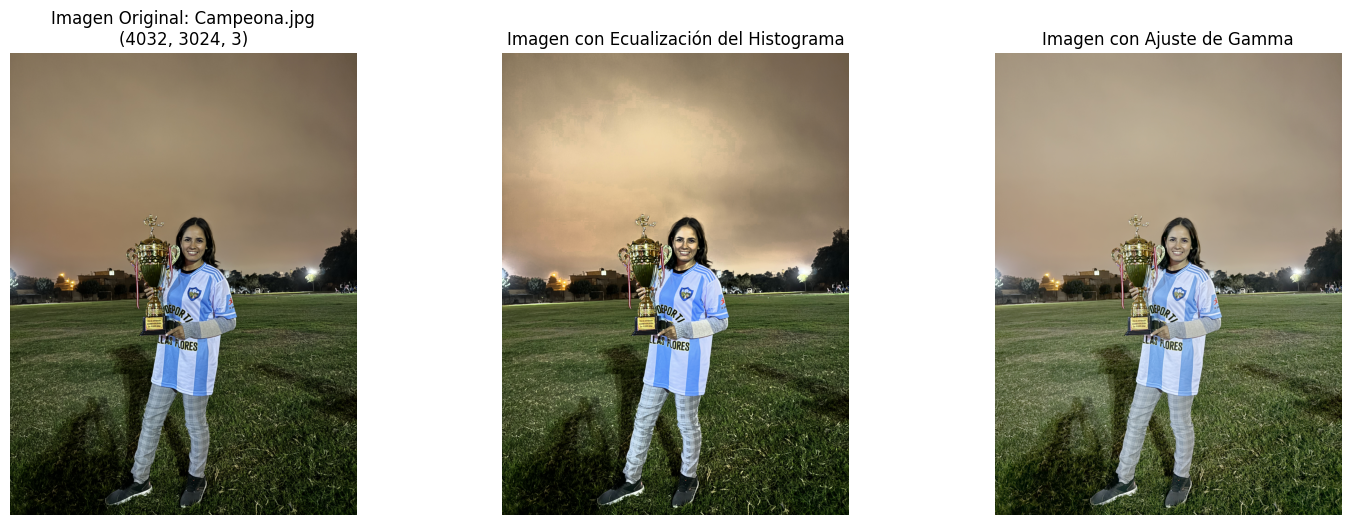

In [8]:
# Función Principal
def main():
    images = upload_images()
    display_images(images)

main()